In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

/home/jongli/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jongli/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jongli/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
data = pd.read_csv('data.csv')
print(data.shape)
data.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
del data['Unnamed: 32']

In [6]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building Neural Network

In [21]:
class NN:
    def __init__(self, X, y, X_test, y_test, hidden_nodes = 12, learning_rate = 0.01, epochs = 10000):
        #epochs is the number of times we will train our network on the dataset
        
        #data
        self.y = y[:,None]
        self.X = X
        
        self.X_test = X_test
        self.y_test = y_test
        
        #parameters
        np.random.seed(4)
        self.input_nodes = len(X[0])
        self.hidden_nodes = hidden_nodes
        self.output_nodes = self.y.shape[1]
        self.learning_rate = learning_rate
        
        
        #init weights
        self.w1 = 2*np.random.random((self.input_nodes, self.hidden_nodes)) - 1
        self.w2 = 2*np.random.random((self.hidden_nodes, self.output_nodes)) - 1
        
        self.train(epochs)
        self.test()
        
    def sigmoid(self, X):
        return (1/(1+np.exp(-X)))
    
    def sigmoid_prime(self,X):
        return X * (1-X)
    
    def train(self, epochs):
        for e in range(epochs):
            #forword propagation
            
            #hidden layer
            l1 = self.sigmoid(np.dot(self.X, self.w1))
            
            #output layer
            l2 = self.sigmoid(np.dot(l1,self.w2))
            
            
            #backword propagation
            
            #calculating error to tune weight value
            
            error = self.y - l2
            
            
            #calculating how far off each layer is 
            ''' Now that we know the eror of the network we need to find the error for each of our layers.We do this by multiplying 
            the error of the previous layer by the derivative of the current layer. The derivative of the current layer is calculating  using the sigmoid prime function 
            the next layer uses the dot product of the previous error and the weights for the previous layer as teh error.
            Once again this is ultiplied by the sigmoid prime of the current layer'''
            
            l2_delta = error * self.sigmoid_prime(l2)
            l1_delta = l2_delta.dot(self.w2.T) * self.sigmoid_prime(l1)
            
            #update weights with new correction
            self.w2 = np.add(self.w2, l1.T.dot(l2_delta) * self.learning_rate)
            self.w1 = np.add(self.w1, self.X.T.dot(l1_delta) * self.learning_rate)
            
        print('Error:', (abs(error)).mean())
        
        
    def test(self):
        correct = 0
        pred_list = []
        
        #replicate freedforward network for testing
        l1 = self.sigmoid(np.dot(self.X_test, self.w1))
        l2 = self.sigmoid(np.dot(l1, self.w2))
        
        #Loop through all of the outputs of layer 2
        
        for i in range (len(l2)):
            if l2[i] >= 0.5:
                pred = 1
            else:
                pred = 0
            if pred == self.y_test[i]:
                correct += 1
        
        
            pred_list.append(pred)
        
        print("Test Accuracy: ", ((correct/len(y_test)) * 100), '%')
        
        
        #confusion matrix
        cm = confusion_matrix(y_test,pred_list)
        sns.heatmap(cm,annot = True)
        plt.savefig('h.png')
        plt.show()        

Error: 0.006870746723454188
Test Accuracy:  97.07602339181285 %


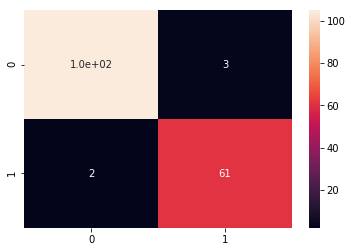

In [22]:
N_N = NN(X_train, y_train, X_test, y_test)